In [230]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Посмотрим на тренировочную выборку и разметим её

In [231]:
chunksize = 10 ** 7
num_of_chunk = 0
train = pd.DataFrame()

for chunk in pd.read_csv('/kaggle/input/avazu-ctr-prediction/train.gz',chunksize=chunksize):
    num_of_chunk = num_of_chunk + 1
    train = pd.concat([train,chunk.sample(frac=0.01)],axis = 0,ignore_index = True)
    print(f'NUMBER {str(num_of_chunk)} is done.')

NUMBER 1 is done.
NUMBER 2 is done.
NUMBER 3 is done.
NUMBER 4 is done.
NUMBER 5 is done.


In [232]:
train

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.660703e+19,0,14102214,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,21875,320,50,2526,0,35,100079,221
1,5.224911e+17,1,14102121,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,...,1,0,1037,320,50,178,3,1327,100148,15
2,5.043635e+18,1,14102122,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,100084,33
3,1.727291e+19,0,14102102,1005,1,16c73019,8025317b,28905ebd,ecad2386,7801e8d9,...,1,0,21647,320,50,2487,1,547,-1,51
4,1.644661e+19,0,14102210,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,20251,320,50,2323,0,687,100081,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1.588643e+18,1,14103021,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,22676,320,50,2616,0,35,-1,51
404286,1.189656e+19,1,14103021,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,0,23161,320,50,2667,0,47,-1,221
404287,1.161526e+19,0,14103020,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,19015,300,250,2162,2,39,100059,33
404288,1.745562e+19,0,14103022,1012,0,85f751fd,c4e18dd6,50e219e0,0443d75e,7801e8d9,...,1,3,20153,320,50,2307,3,163,100020,61


In [233]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [234]:
train = train.drop(columns=['id', 'site_id', 'app_id', 'device_id', 'device_ip', 'device_model'])

In [235]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102214,1005,1,7e091613,f028772b,7801e8d9,07d7df22,1,0,21875,320,50,2526,0,35,100079,221
1,1,14102121,1005,0,c4e18dd6,50e219e0,b9528b13,cef3e649,1,0,1037,320,50,178,3,1327,100148,15
2,1,14102122,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,100084,33
3,0,14102102,1005,1,8025317b,28905ebd,7801e8d9,07d7df22,1,0,21647,320,50,2487,1,547,-1,51
4,0,14102210,1005,0,bb1ef334,f028772b,7801e8d9,07d7df22,1,0,20251,320,50,2323,0,687,100081,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1,14103021,1005,0,f3845767,28905ebd,7801e8d9,07d7df22,1,0,22676,320,50,2616,0,35,-1,51
404286,1,14103021,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23161,320,50,2667,0,47,-1,221
404287,0,14103020,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,19015,300,250,2162,2,39,100059,33
404288,0,14103022,1012,0,c4e18dd6,50e219e0,7801e8d9,07d7df22,1,3,20153,320,50,2307,3,163,100020,61


In [236]:
train['hour'] = pd.to_datetime(train['hour'], format = '%y%m%d%H')

In [237]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,2014-10-22 14:00:00,1005,1,7e091613,f028772b,7801e8d9,07d7df22,1,0,21875,320,50,2526,0,35,100079,221
1,1,2014-10-21 21:00:00,1005,0,c4e18dd6,50e219e0,b9528b13,cef3e649,1,0,1037,320,50,178,3,1327,100148,15
2,1,2014-10-21 22:00:00,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,100084,33
3,0,2014-10-21 02:00:00,1005,1,8025317b,28905ebd,7801e8d9,07d7df22,1,0,21647,320,50,2487,1,547,-1,51
4,0,2014-10-22 10:00:00,1005,0,bb1ef334,f028772b,7801e8d9,07d7df22,1,0,20251,320,50,2323,0,687,100081,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1,2014-10-30 21:00:00,1005,0,f3845767,28905ebd,7801e8d9,07d7df22,1,0,22676,320,50,2616,0,35,-1,51
404286,1,2014-10-30 21:00:00,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23161,320,50,2667,0,47,-1,221
404287,0,2014-10-30 20:00:00,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,19015,300,250,2162,2,39,100059,33
404288,0,2014-10-30 22:00:00,1012,0,c4e18dd6,50e219e0,7801e8d9,07d7df22,1,3,20153,320,50,2307,3,163,100020,61


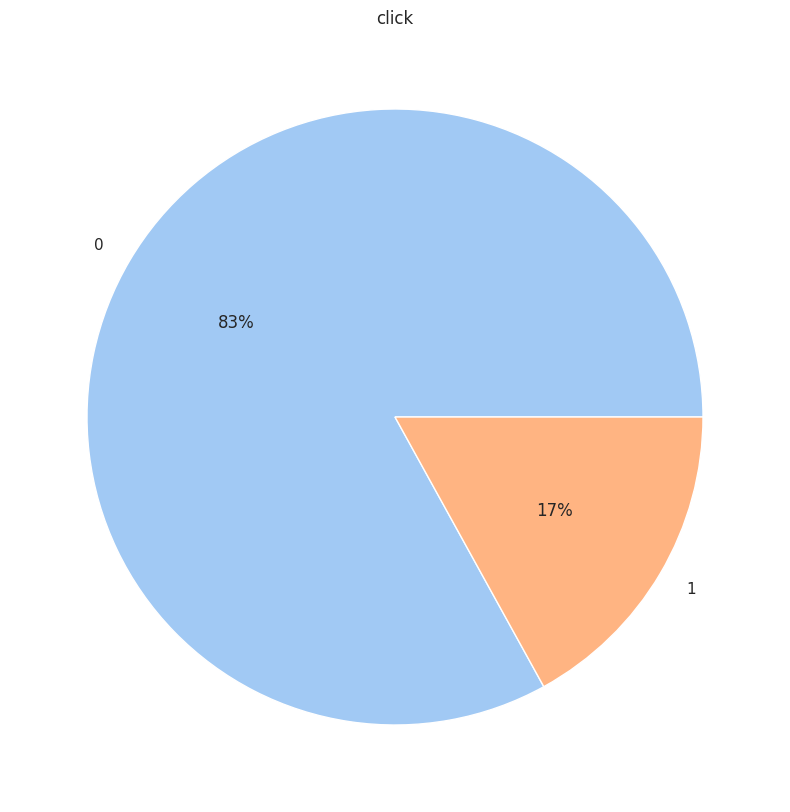

In [238]:
sns.set(rc={'figure.figsize': (10, 10)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(train['click'].unique())
dt = np.array([len(train[train['click'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('click')
plt.show()

<Axes: xlabel='hour', ylabel='click'>

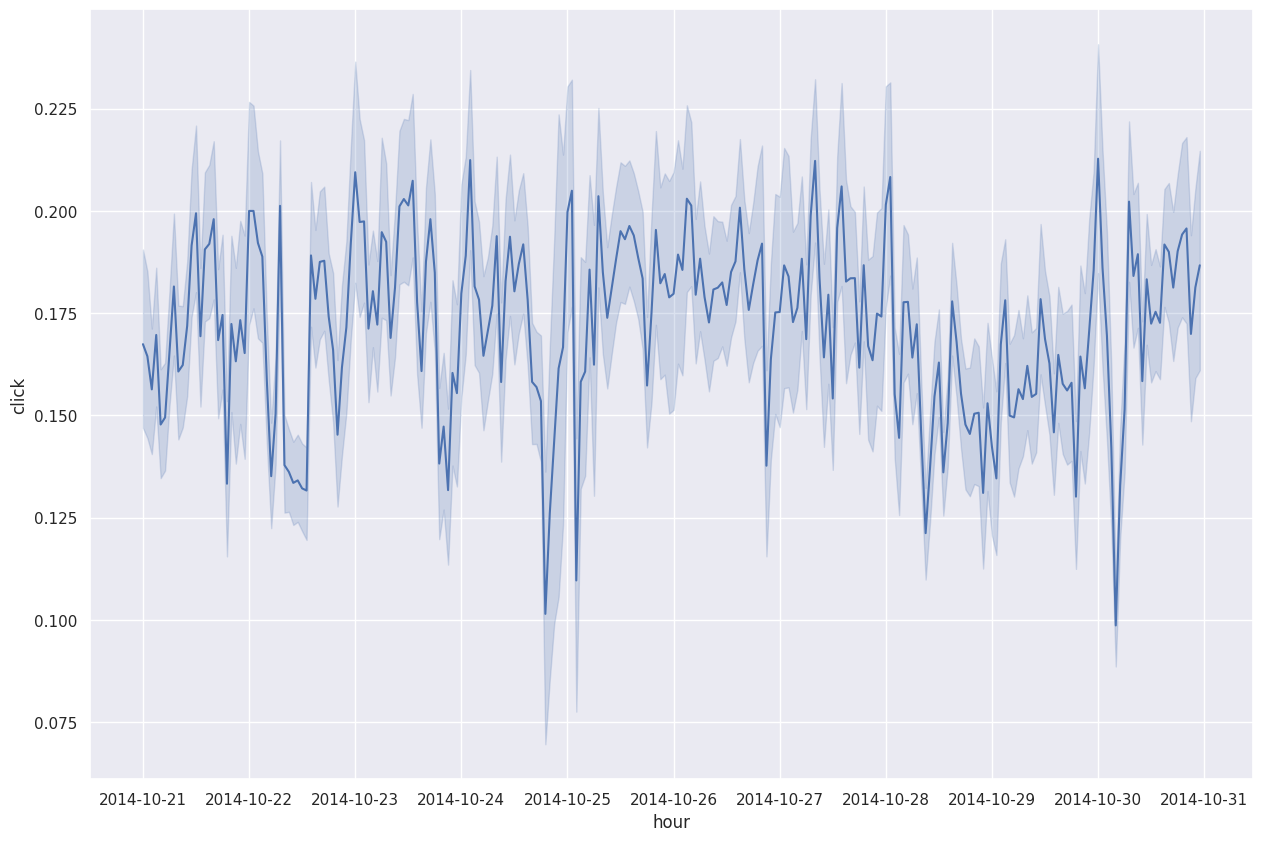

In [239]:
sns.set(rc={'figure.figsize': (15, 10)})

sns.lineplot(data=train, x='hour', y='click')

In [240]:
features = {
    'hour': [],
    'day': []
}

for elem in train['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    train[elem] = features[elem]

In [241]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,14,1005,1,7e091613,f028772b,7801e8d9,07d7df22,1,0,21875,320,50,2526,0,35,100079,221,22
1,1,21,1005,0,c4e18dd6,50e219e0,b9528b13,cef3e649,1,0,1037,320,50,178,3,1327,100148,15,21
2,1,22,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,100084,33,21
3,0,2,1005,1,8025317b,28905ebd,7801e8d9,07d7df22,1,0,21647,320,50,2487,1,547,-1,51,21
4,0,10,1005,0,bb1ef334,f028772b,7801e8d9,07d7df22,1,0,20251,320,50,2323,0,687,100081,48,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1,21,1005,0,f3845767,28905ebd,7801e8d9,07d7df22,1,0,22676,320,50,2616,0,35,-1,51,30
404286,1,21,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23161,320,50,2667,0,47,-1,221,30
404287,0,20,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,19015,300,250,2162,2,39,100059,33,30
404288,0,22,1012,0,c4e18dd6,50e219e0,7801e8d9,07d7df22,1,3,20153,320,50,2307,3,163,100020,61,30


In [242]:
train.isnull().sum()

click               0
hour                0
C1                  0
banner_pos          0
site_domain         0
site_category       0
app_domain          0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   click             404290 non-null  int64 
 1   hour              404290 non-null  int64 
 2   C1                404290 non-null  int64 
 3   banner_pos        404290 non-null  int64 
 4   site_domain       404290 non-null  object
 5   site_category     404290 non-null  object
 6   app_domain        404290 non-null  object
 7   app_category      404290 non-null  object
 8   device_type       404290 non-null  int64 
 9   device_conn_type  404290 non-null  int64 
 10  C14               404290 non-null  int64 
 11  C15               404290 non-null  int64 
 12  C16               404290 non-null  int64 
 13  C17               404290 non-null  int64 
 14  C18               404290 non-null  int64 
 15  C19               404290 non-null  int64 
 16  C20               404290 non-null  int

In [244]:
train['site_category'] = train['site_category'].astype('category')
train['site_category'] = train['site_category'].cat.codes

train['app_category'] = train['app_category'].astype('category')
train['app_category'] = train['app_category'].cat.codes

train['app_domain'] = train['app_domain'].astype('category')
train['app_domain'] = train['app_domain'].cat.codes

train['site_domain'] = train['site_domain'].astype('category')
train['site_domain'] = train['site_domain'].cat.codes

In [245]:
train

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,14,1005,1,1062,19,65,0,1,0,21875,320,50,2526,0,35,100079,221,22
1,1,21,1005,0,1651,5,110,20,1,0,1037,320,50,178,3,1327,100148,15,21
2,1,22,1005,0,1000,3,65,0,1,0,17654,300,250,1994,2,39,100084,33,21
3,0,2,1005,1,1084,1,65,0,1,0,21647,320,50,2487,1,547,-1,51,21
4,0,10,1005,0,1579,19,65,0,1,0,20251,320,50,2323,0,687,100081,48,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1,21,1005,0,2031,1,65,0,1,0,22676,320,50,2616,0,35,-1,51,30
404286,1,21,1005,0,1651,5,20,23,1,0,23161,320,50,2667,0,47,-1,221,30
404287,0,20,1005,0,1000,3,65,0,1,0,19015,300,250,2162,2,39,100059,33,30
404288,0,22,1012,0,1651,5,65,0,1,3,20153,320,50,2307,3,163,100020,61,30


In [246]:
train.describe()

,click,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,0.169742,11.279742,1004.968194,0.289201,1424.108902,8.663578,62.377684,2.888605,1.016293,0.331027,18845.902513,318.857197,60.119414,2112.812555,1.432531,226.618027,53260.044433,83.451127,25.472295
std,0.375406,5.959420,1.093874,0.501292,509.020274,7.299386,23.518978,6.042305,0.530590,0.855101,4951.663530,21.280445,47.233092,608.623655,1.326739,350.553273,49954.150600,70.349527,2.963792
min,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,21.000000
25%,0.000000,7.000000,1005.000000,0.000000,1062.000000,3.000000,65.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,23.000000
50%,0.000000,11.000000,1005.000000,0.000000,1651.000000,5.000000,65.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000,26.000000
75%,0.000000,16.000000,1005.000000,1.000000,1651.000000,19.000000,65.000000,3.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100094.000000,104.000000,28.000000
max,1.000000,23.000000,1012.000000,7.000000,2133.000000,20.000000,147.000000,24.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,30.000000


In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   click             404290 non-null  int64
 1   hour              404290 non-null  int64
 2   C1                404290 non-null  int64
 3   banner_pos        404290 non-null  int64
 4   site_domain       404290 non-null  int16
 5   site_category     404290 non-null  int8 
 6   app_domain        404290 non-null  int16
 7   app_category      404290 non-null  int8 
 8   device_type       404290 non-null  int64
 9   device_conn_type  404290 non-null  int64
 10  C14               404290 non-null  int64
 11  C15               404290 non-null  int64
 12  C16               404290 non-null  int64
 13  C17               404290 non-null  int64
 14  C18               404290 non-null  int64
 15  C19               404290 non-null  int64
 16  C20               404290 non-null  int64
 17  C21       

<Axes: >

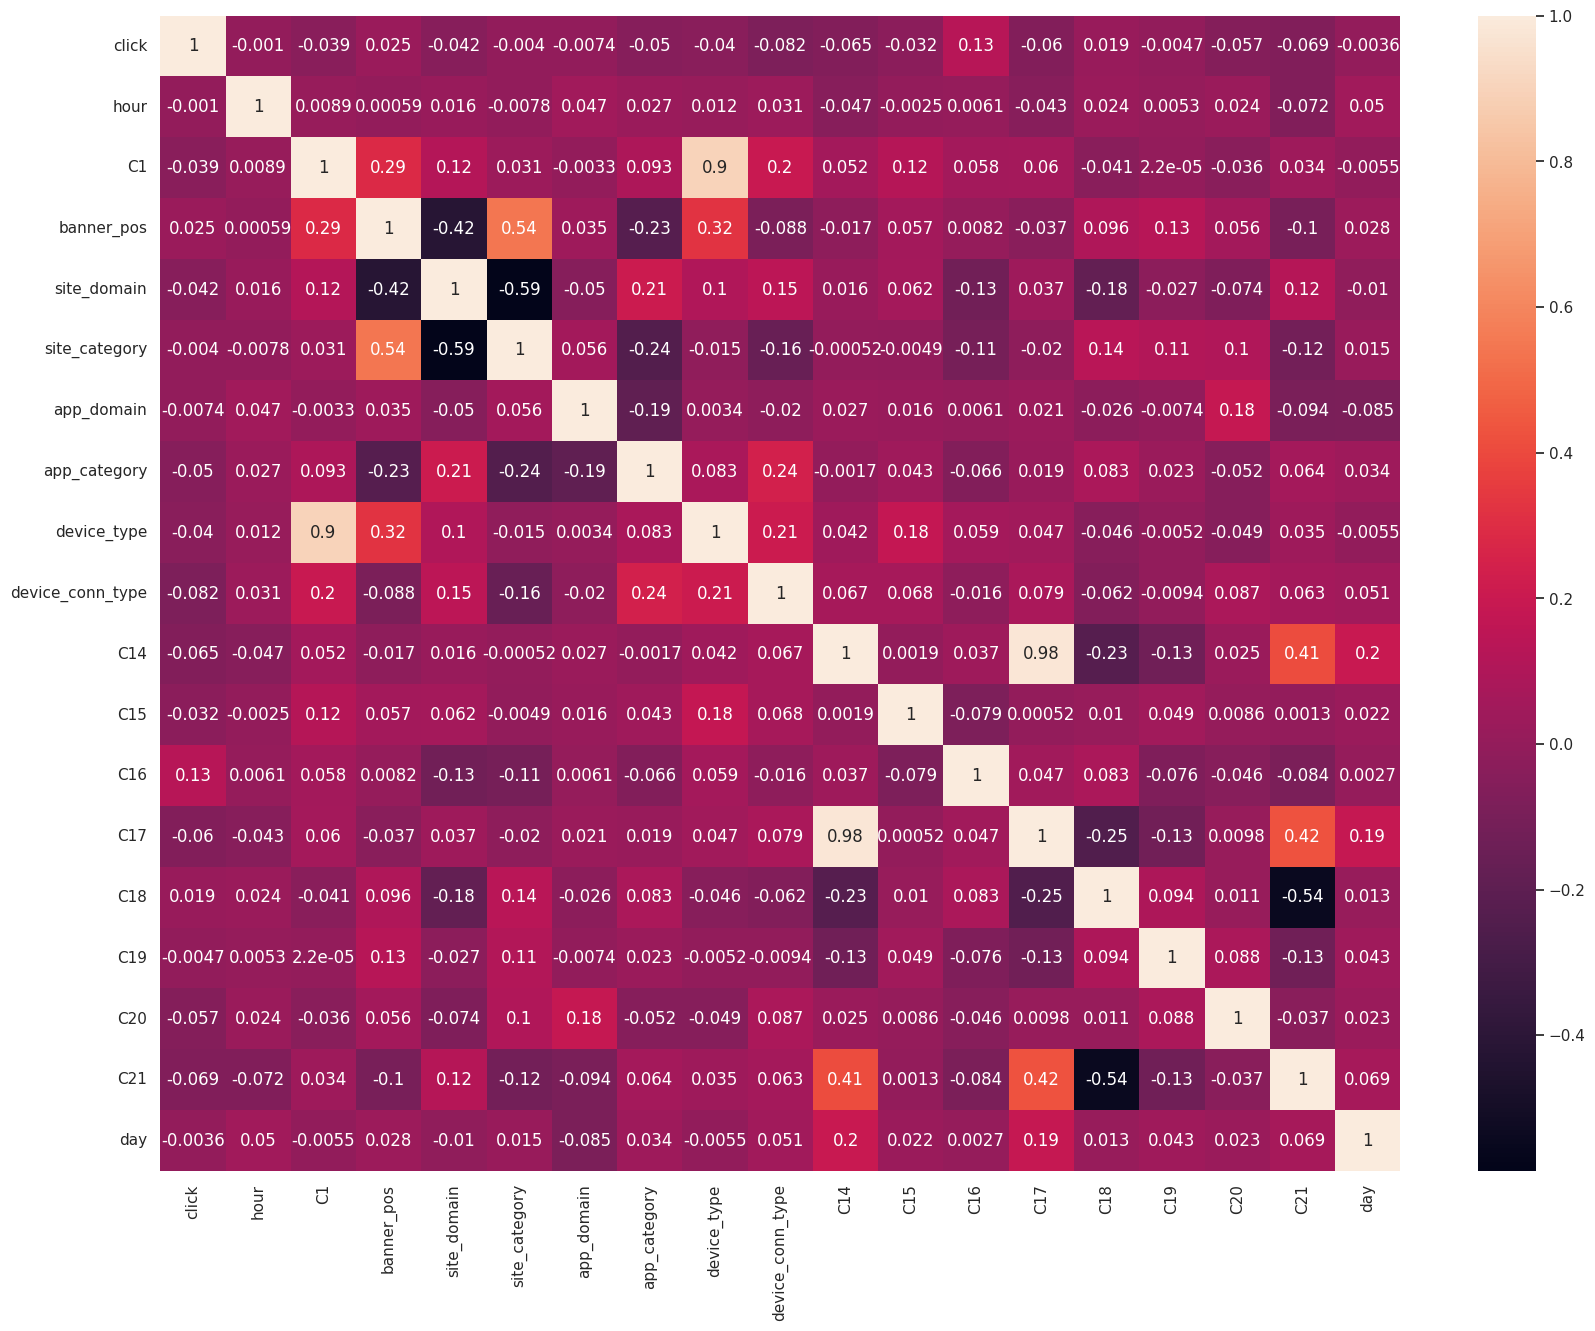

In [248]:
corr_matrix = train.corr()

sns.set(rc={'figure.figsize': (20, 15)})

sns.heatmap(corr_matrix, annot=True)

In [249]:
import math
from sklearn import preprocessing

scaled = preprocessing.StandardScaler()

scaled.fit(train.drop(columns=['click']), train['click'])

StandardScaler()

In [250]:
df_scaled = scaled.transform(train.drop(columns=['click']))

In [251]:
df_scaled

array([[ 0.45646407,  0.02907686,  1.41793558, ...,  0.93723971,
         1.95522342, -1.17157306],
       [ 1.63107648,  0.02907686, -0.57691138, ...,  0.93862098,
        -0.97301594, -1.50897907],
       [ 1.79887826,  0.02907686, -0.57691138, ...,  0.9373398 ,
        -0.71715036, -1.50897907],
       ...,
       [ 1.46327471,  0.02907686, -0.57691138, ...,  0.93683934,
        -0.71715036,  1.52767498],
       [ 1.79887826,  6.42836045, -0.57691138, ...,  0.93605862,
        -0.31913725,  1.52767498],
       [ 1.63107648,  0.02907686, -0.57691138, ...,  0.93862098,
        -0.8592979 ,  1.52767498]])

In [252]:
df_scaled.shape

(404290, 18)

In [253]:
from sklearn.decomposition import PCA

In [254]:
pca = PCA(n_components=5)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.15096834 0.12503923 0.11623996 0.07075725 0.06969727]


In [255]:
print(pca.components_)

[[ 0.03438827 -0.1148263   0.21017233 -0.27826036  0.26999623  0.05561795
  -0.14854159 -0.11331015 -0.17594972 -0.44269243 -0.03013749  0.01165144
  -0.45466848  0.33121051  0.15242501  0.05051089 -0.41282923 -0.11189535]
 [-0.01053322  0.43966971  0.49969726 -0.27986138  0.37805119  0.07450061
  -0.14812891  0.44256121  0.03587693  0.20720611  0.11143679  0.04510192
   0.19799863 -0.01014577  0.04657313  0.06766     0.04350019  0.07526461]
 [ 0.05603919  0.43519493 -0.05826892  0.32834941 -0.27768375 -0.09229123
   0.2858097   0.44641859  0.26408541 -0.30935497  0.1634659  -0.00161769
  -0.29564322  0.08969103  0.0536266  -0.09247323 -0.14840541 -0.09266993]
 [ 0.13577789 -0.10158928 -0.01603872 -0.09395424  0.06534547 -0.28846205
   0.41127689 -0.1107727   0.23645527  0.1869774   0.06935782  0.00535006
   0.18232572  0.43887866  0.26114999  0.09525104 -0.20225786  0.5034992 ]
 [ 0.12531806 -0.07118912 -0.01769007  0.13417247  0.06184402  0.38826578
  -0.01582917 -0.06561329  0.21747

In [256]:
zzz = pca.transform(df_scaled)

In [257]:
zzz

array([[-0.61381295,  1.80587489, -1.70930533, -1.39321986,  0.71207338],
       [ 3.95666697, -2.23981567,  3.46330689,  0.26075331,  2.56711257],
       [ 0.94963421, -0.41953066, -0.02383976, -0.63683074, -1.87759205],
       ...,
       [ 0.35109982, -0.07587065, -0.49064274,  0.94822698, -1.94715528],
       [-1.41987123,  2.64033215,  3.62998383,  1.54254563,  0.86269728],
       [-1.0157649 , -0.23594003,  0.55640163,  2.87678751,  0.09679773]])

In [258]:
zzz.shape

(404290, 5)

In [259]:
pd.DataFrame(pca.components_, columns=train.columns[1:])

,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0.034388,-0.114826,0.210172,-0.278260,0.269996,0.055618,-0.148542,-0.113310,-0.175950,-0.442692,-0.030137,0.011651,-0.454668,0.331211,0.152425,0.050511,-0.412829,-0.111895
1,-0.010533,0.439670,0.499697,-0.279861,0.378051,0.074501,-0.148129,0.442561,0.035877,0.207206,0.111437,0.045102,0.197999,-0.010146,0.046573,0.067660,0.043500,0.075265
2,0.056039,0.435195,-0.058269,0.328349,-0.277684,-0.092291,0.285810,0.446419,0.264085,-0.309355,0.163466,-0.001618,-0.295643,0.089691,0.053627,-0.092473,-0.148405,-0.092670
3,0.135778,-0.101589,-0.016039,-0.093954,0.065345,-0.288462,0.411277,-0.110773,0.236455,0.186977,0.069358,0.005350,0.182326,0.438879,0.261150,0.095251,-0.202258,0.503499
4,0.125318,-0.071189,-0.017690,0.134172,0.061844,0.388266,-0.015829,-0.065613,0.217473,-0.039907,0.250073,-0.486179,-0.045819,-0.181607,0.319286,0.560114,0.056886,-0.001189


In [260]:
pd.Series(pca.noise_variance_, train.columns[1:])

hour                0.64703
C1                  0.64703
banner_pos          0.64703
site_domain         0.64703
site_category       0.64703
app_domain          0.64703
app_category        0.64703
device_type         0.64703
device_conn_type    0.64703
C14                 0.64703
C15                 0.64703
C16                 0.64703
C17                 0.64703
C18                 0.64703
C19                 0.64703
C20                 0.64703
C21                 0.64703
day                 0.64703
dtype: float64

In [261]:
from sklearn.model_selection import train_test_split
Y = train['click']

X_train, X_valid, Y_train, Y_valid = train_test_split(zzz, Y, test_size=0.1, random_state=42)

# Обучим модель

In [262]:
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

In [263]:
sgd = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    n_iter_no_change=80,
    shuffle=True,
    max_iter=10000,
    warm_start=True
)

In [264]:
sgd.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

SGDClassifier(loss='log_loss', max_iter=10000, n_iter_no_change=80,
              warm_start=True)

In [265]:
cat = CatBoostClassifier(
    iterations=5000,
    verbose=1000,
    learning_rate=0.005,
    l2_leaf_reg=0.03,
    depth=7,
    leaf_estimation_method='Newton',
    leaf_estimation_iterations=65,
    use_best_model=True
)

In [266]:
cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid))

0:	learn: 0.6901282	test: 0.6901943	best: 0.6901943 (0)	total: 92.5ms	remaining: 7m 42s
1000:	learn: 0.4260514	test: 0.4313669	best: 0.4313669 (1000)	total: 1m 41s	remaining: 6m 45s
2000:	learn: 0.4218662	test: 0.4281171	best: 0.4281171 (2000)	total: 3m 24s	remaining: 5m 6s
3000:	learn: 0.4193037	test: 0.4264071	best: 0.4264071 (3000)	total: 5m 9s	remaining: 3m 25s
4000:	learn: 0.4172880	test: 0.4253062	best: 0.4253062 (4000)	total: 6m 56s	remaining: 1m 43s
4999:	learn: 0.4155089	test: 0.4245012	best: 0.4245012 (4999)	total: 8m 49s	remaining: 0us

bestTest = 0.4245012391
bestIteration = 4999



In [267]:
from sklearn.metrics import log_loss


preds_val_sgd = sgd.predict_proba(X_valid)
preds_val_cat = cat.predict_proba(X_valid)

In [268]:
preds_val_sgd = np.array(list(map(lambda x: x[1], preds_val_sgd)))
preds_val_cat = np.array(list(map(lambda x: x[1], preds_val_cat)))

In [269]:
preds_val_sgd

array([0.15407929, 0.25680793, 0.20122024, ..., 0.20511726, 0.23960358,
       0.23232635])

In [270]:
preds_val_cat

array([0.16704663, 0.27673638, 0.12395171, ..., 0.20045857, 0.13715764,
       0.18441367])

In [271]:
log_loss(y_pred=preds_val_sgd, y_true=Y_valid)

0.4602146978779167

In [272]:
log_loss(y_pred=preds_val_cat, y_true=Y_valid)

0.4245012390513752

In [273]:
pred_val = [(i + j) / 2 for i, j in zip(preds_val_sgd, preds_val_cat)]

In [274]:
log_loss(y_pred=pred_val, y_true=Y_valid)

0.4351986830618046

# Тоже самое сделаем с тестовой выбокрой

In [205]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [206]:
test_df = test_df.drop(columns=['id', 'site_id', 'app_id', 'device_id', 'device_ip', 'device_model'])

test_df['hour'] = pd.to_datetime(test_df['hour'], format = '%y%m%d%H')
features = {
    'hour': [],
    'day': []
}

for elem in test_df['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    test_df[elem] = features[elem]

In [207]:
test_df

,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,f6ebf28e,f028772b,7801e8d9,07d7df22,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,f3845767,28905ebd,7801e8d9,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,f3845767,28905ebd,7801e8d9,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,c4e18dd6,50e219e0,aefc06bd,0f2161f8,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,c4e18dd6,50e219e0,2347f47a,f95efa07,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,f3845767,f028772b,7801e8d9,07d7df22,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,7687a86e,3e814130,7801e8d9,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,c4e18dd6,50e219e0,ae637522,0f2161f8,1,3,23857,320,50,2734,1,175,100189,71,31


In [208]:
test_df.isnull().sum()

hour                0
C1                  0
banner_pos          0
site_domain         0
site_category       0
app_domain          0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [209]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577464 entries, 0 to 4577463
Data columns (total 18 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hour              int64 
 1   C1                object
 2   banner_pos        object
 3   site_domain       object
 4   site_category     object
 5   app_domain        object
 6   app_category      object
 7   device_type       object
 8   device_conn_type  object
 9   C14               object
 10  C15               object
 11  C16               object
 12  C17               object
 13  C18               object
 14  C19               object
 15  C20               object
 16  C21               object
 17  day               int64 
dtypes: int64(2), object(16)
memory usage: 628.6+ MB


In [210]:
test_df['site_category'] = test_df['site_category'].astype('category')
test_df['site_category'] = test_df['site_category'].cat.codes

test_df['app_category'] = test_df['app_category'].astype('category')
test_df['app_category'] = test_df['app_category'].cat.codes

test_df['app_domain'] = test_df['app_domain'].astype('category')
test_df['app_domain'] = test_df['app_domain'].cat.codes

test_df['site_domain'] = test_df['site_domain'].astype('category')
test_df['site_domain'] = test_df['site_domain'].cat.codes

In [211]:
test_df

,hour,C1,banner_pos,site_domain,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,3234,20,94,0,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,3197,1,94,0,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,3197,1,94,0,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,2590,5,137,3,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,2590,5,21,26,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,1565,3,94,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,3197,20,94,0,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,1565,3,94,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,2590,5,136,3,1,3,23857,320,50,2734,1,175,100189,71,31


# Предскажем тест

In [212]:
test_df_scaled = scaled.transform(test_df)

In [213]:
test_df_scaled

array([[-1.8986142 ,  0.02992663, -0.56947641, ...,  0.93893361,
        -0.85807205,  1.8651834 ],
       [-1.8986142 ,  0.02992663, -0.56947641, ...,  0.93909374,
        -0.45983777,  1.8651834 ],
       [-1.8986142 ,  0.02992663, -0.56947641, ...,  0.93909374,
        -0.45983777,  1.8651834 ],
       ...,
       [ 1.97257702,  0.02992663, -0.56947641, ..., -1.06418422,
        -0.71584552,  1.8651834 ],
       [ 1.97257702,  0.02992663, -0.56947641, ...,  0.94121543,
        -0.17538471,  1.8651834 ],
       [ 1.97257702,  0.02992663, -0.56947641, ...,  0.93911376,
         1.95801326,  1.8651834 ]])

In [214]:
test_df_zzz = pca.transform(test_df_scaled)

In [215]:
test_df_zzz

array([[ 2.04025346, -1.13622682],
       [-2.28017558, -1.01143079],
       [-2.28017558, -1.01143079],
       ...,
       [ 0.2810943 , -0.45160154],
       [-2.29687645, -0.25160307],
       [-2.26665845, -0.01531489]])

In [216]:
predict_test_sgd = sgd.predict_proba(test_df_zzz)
predict_test_cat = cat.predict_proba(test_df_zzz)

In [217]:
predict_test_sgd = np.array(list(map(lambda x: x[1], predict_test_sgd)))
predict_test_cat = np.array(list(map(lambda x: x[1], predict_test_cat)))

In [218]:
predict_test = np.array([(i + j) / 2 for i, j in zip(predict_test_sgd, predict_test_cat)])

In [219]:
len([i for i in predict_test if i >= 0.5])

28

In [220]:
len([i for i in predict_test if i <= 0.5])

4577436

# Сохраним ответ

In [221]:
submit_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [222]:
submit_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [223]:
submit_df.columns

Index(['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [224]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [225]:
test_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [226]:
submit_df["click"] = predict_test
submit_df[['id', 'click']].to_csv("submission_difm.csv", index=False)

In [227]:
submit_df[['id', 'click']]

,id,click
0,10000174058809263569,0.199985
1,10000182526920855428,0.145974
2,10000554139829213984,0.145974
3,10001094637809798845,0.186771
4,10001377041558670745,0.067209
...,...,...
4577459,9998166651591969718,0.200755
4577460,9998249812366450951,0.151333
4577461,99988023653614546,0.200755
4577462,9999086574712596585,0.122956
